0.004288911819458008 24 [[1.0000001]
 [1.0000001]]
0.001008749008178711 4 [[2.19343942]
 [3.02046647]]


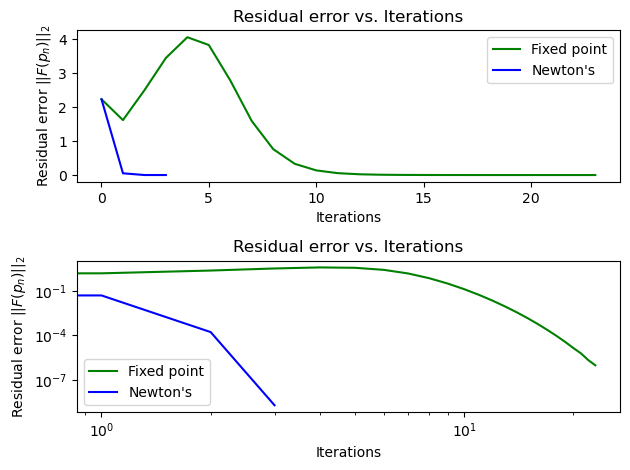

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import time

#gaussian elimination without pivoting
def Gaussian_Elim(A, b): #based on algorithm 6.1
    #coefficient of unknowns matrix A, constants matrix b
    for i in range(n - 1):
        for j in range(i + 1, n):
          m = A[j][i]/A[i][i]
          A[j] = A[j] - m * A[i]
          b[j] = b[j] - m * b[i]
    if A[n-1][n-1] == 0:
        print("no unique solution exists")
    return A, b

#back substitution of upper triangular matrix
def Backsolve(A, b): #based on algorithm 6.1
    #coefficient of unknowns matrix A, constants matrix b
    x = np.zeros((n,1))
    for i in range(n - 1, -1, -1):
        x_i = b[i]
        for j in range(i + 1, n):
            x_i = x_i - A[i][j] * x[j]
        x[i] = x_i/A[i][i]
    return x

def fp(x, test): #for fixed point iteration
    if test == 1:
        return np.array([[(x[0,0] ** 2 + x[1,0] ** 2 + 8)/10], [(x[0,0] * x[1,0] ** 2 + x[0,0] + 8)/10]], dtype=np.float32)
    
def f(x, test): #system of nonlinear eqs
    if test == 1:
        return np.array([[x[0] ** 2 - 10 * x[0] + x[1] ** 2 + 8], [x[0] * x[1] ** 2 + x[0] - 10 * x[1] + 8]], dtype=np.float32)

def j(x, test): #jacobian
    if test == 1:
        return np.array([[2 * x[0] - 10, 2 * x[1]], [x[1] ** 2 + 1, 2 * x[0] * x[1] - 10]], dtype=np.float32)

N = 25 #number of iterations, adjusted to # of iterations for slowest converging algorithm
epsilon = 1e-6 #tolerance, checked against absolute error
test = 1 #test function selection

def Fixed_Point(p): #based on algorithm 2.2
    #initial guess p
    i = 0 #iteration
    p_arr = np.array([np.linalg.norm(f(p, test))]) #store approximations
    while np.abs(np.linalg.norm(f(p, test))) > epsilon: #ensure algorithms run for same number of iterations
        i += 1
        p = fp(p, test)
        p_arr = np.append(p_arr, np.linalg.norm(f(p, test)))
    return p_arr, p

def Newton(p): #based on algorithm 2.3
    #initial guess p
    i = 0 #iteration
    p_arr = np.array([np.linalg.norm(f(p, test))]) #store approximations
    while np.abs(np.linalg.norm(f(p, test))) > epsilon: #ensure algorithms run for same number of iterations
        i += 1
        ff, jj = Gaussian_Elim(j(p, test), -1 * f(p, test))
        p = p + Backsolve(ff, jj)
        p_arr = np.append(p_arr, np.linalg.norm(f(p, test)))
    return p_arr, p

#store approximation arrays to minimize function calls
if test == 1:
    n = 2 #number of eqs
    p_0 = np.array([[2], [3]], dtype=np.float32)
    t0_fp = time.time()
    res_err_fp, p_fp = Fixed_Point(p_0)
    t1_fp = time.time()
    time_fp = t1_fp - t0_fp
    print(time_fp, len(res_err_fp), p_fp)
    t0_newton = time.time()
    res_err_newton, p_newton = Newton(p_0)
    t1_newton = time.time()
    time_newton = t1_newton - t0_newton
    print(time_newton, len(res_err_newton), p_newton)
    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.plot(res_err_fp, "g-", label="Fixed point")
    ax1.plot(res_err_newton, "b-", label="Newton's")
    ax1.set_xlabel("Iterations")
    ax1.set_ylabel("Residual error $||F(p_n)||_2$")
    ax1.set_title("Residual error vs. Iterations")
    ax1.legend()
    ax2.plot(res_err_fp, "g-", label="Fixed point")
    ax2.plot(res_err_newton, "b-", label="Newton's")
    ax2.set_xlabel("Iterations")
    ax2.set_ylabel("Residual error $||F(p_n)||_2$")
    ax2.set_title("Residual error vs. Iterations")
    ax2.legend()
    ax2.loglog()
    fig.tight_layout()
    plt.show()